# Antarctic SMB trends

Author: Ziqi Yin

Last edited: Jul 27, 2025

## Description

SMB and sea level pressure trends:
- Data: [CESM2-GOGA] + ERSSTv5, ([CESM2-SOPACE] + ERSSTv5), [CESM1-GOGA] + ERSSTv5, [CESM1-meltwater] + SST due to meltwater
- Period: 1980-2013

In [42]:
# Load Libraries
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import cartopy.util as util
import xarray as xr
import pandas as pd
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from scipy.stats import linregress
from scipy.stats import pearsonr
import matplotlib.path as mpath
import matplotlib.colors as colors

import sys  
home_dir = '/glade/work/ziqiyin/'
sys.path.insert(0, home_dir)
sys.path.append(home_dir + 'function/')

from functions import *

In [2]:
### --- Plot basemap of Antarctica with cartopy --- ###
def plot_antarctica_SO(ax, lat):
    coast_line = gpd.read_file('/glade/work/ziqiyin/shp_files/Coastline_Antarctica_v2.shp')
    grounding_line = gpd.read_file('/glade/work/ziqiyin/shp_files/GroundingLine_Antarctica_v2.shp')
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.51
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    
    ax.add_geometries(coast_line['geometry'], crs = ccrs.SouthPolarStereo(central_longitude=0), facecolor='none', edgecolor='black', linewidth = 0.5)
    #ax.add_geometries(grounding_line['geometry'], crs = ccrs.SouthPolarStereo(central_longitude=0), facecolor='white', edgecolor='black', linewidth = 0.5)
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.set_extent([-180, 180, -90, lat], ccrs.PlateCarree())
    return

## Read data

### SMB

In [3]:
## SMB variables
#CESM2-GOGA (10 members, 1880-2021)
path = '/glade/campaign/cgd/cas/dschneid/SMB_variables_CESM2/GOGA/'

fn_RAIN_GOGA2 = 'f.e21.FHIST_BGC.f09_f09.historical.ersstv5.goga.EM1-10.clm2.h0.RAIN.188001-202112.nc'
RAIN_GOGA2 = xr.open_dataset(path+fn_RAIN_GOGA2).RAIN
fn_SNOW_GOGA2 = 'f.e21.FHIST_BGC.f09_f09.historical.ersstv5.goga.EM1-10.clm2.h0.SNOW.188001-202112.nc'
SNOW_GOGA2 = xr.open_dataset(path+fn_SNOW_GOGA2).SNOW
fn_QSOIL_GOGA2 = 'f.e21.FHIST_BGC.f09_f09.historical.ersstv5.goga.EM1-10.clm2.h0.QSOIL.188001-202112.nc'
QSOIL_GOGA2 = xr.open_dataset(path+fn_QSOIL_GOGA2).QSOIL
fn_QRUNOFF_GOGA2 = 'f.e21.FHIST_BGC.f09_f09.historical.ersstv5.goga.EM1-10.clm2.h0.QRUNOFF.188001-202112.nc'
QRUNOFF_GOGA2 = xr.open_dataset(path+fn_QRUNOFF_GOGA2).QRUNOFF
SMB_GOGA2 = RAIN_GOGA2 + SNOW_GOGA2 - QSOIL_GOGA2 - QRUNOFF_GOGA2

#CESM2-SOPACE (? members, 1970-2013)
path = '/glade/campaign/cgd/cas/dschneid/SMB_variables_CESM2/southern_ocean_pacemaker/'

fn_RAIN_SOPACE = 'SOPacemaker_CESM2_YuYueMatlab.ensmean.RAIN.197001-201312.nc'
RAIN_SOPACE = xr.open_dataset(path+fn_RAIN_SOPACE).RAIN
fn_SNOW_SOPACE = 'SOPacemaker_CESM2_YuYueMatlab.ensmean.SNOW.197001-201312.nc'
SNOW_SOPACE = xr.open_dataset(path+fn_SNOW_SOPACE).SNOW
fn_QSOIL_SOPACE = 'SOPacemaker_CESM2_YuYueMatlab.ensmean.QSOIL.197001-201312.nc'
QSOIL_SOPACE = xr.open_dataset(path+fn_QSOIL_SOPACE).QSOIL
fn_QRUNOFF_SOPACE = 'SOPacemaker_CESM2_YuYueMatlab.ensmean.QRUNOFF.197001-201312.nc'
QRUNOFF_SOPACE = xr.open_dataset(path+fn_QRUNOFF_SOPACE).QRUNOFF
SMB_SOPACE = RAIN_SOPACE + SNOW_SOPACE - QSOIL_SOPACE - QRUNOFF_SOPACE

#CESM1-GOGA (10 members, 1880-2015)
path = '/glade/campaign/cgd/cas/dschneid/SMB_variables_CESM2/CESM1_GOGA/'

fn_RAIN_GOGA1 = 'f.e11.FAMIPC5CN.f09_f09.rcp85.goga.EM1-10.clm2.h0.RAIN.188001-201512.nc'
RAIN_GOGA1 = xr.open_dataset(path+fn_RAIN_GOGA1).RAIN
fn_SNOW_GOGA1 = 'f.e11.FAMIPC5CN.f09_f09.rcp85.goga.EM1-10.clm2.h0.SNOW.188001-201512.nc'
SNOW_GOGA1 = xr.open_dataset(path+fn_SNOW_GOGA1).SNOW
fn_QSOIL_GOGA1 = 'f.e11.FAMIPC5CN.f09_f09.rcp85.goga.EM1-10.clm2.h0.QSOIL.188001-201512.nc'
QSOIL_GOGA1 = xr.open_dataset(path+fn_QSOIL_GOGA1).QSOIL
fn_QRUNOFF_GOGA1 = 'f.e11.FAMIPC5CN.f09_f09.rcp85.goga.EM1-10.clm2.h0.QRUNOFF.188001-201512.nc'
QRUNOFF_GOGA1 = xr.open_dataset(path+fn_QRUNOFF_GOGA1).QRUNOFF
SMB_GOGA1 = RAIN_GOGA1 + SNOW_GOGA1 - QSOIL_GOGA1 - QRUNOFF_GOGA1

#CESM1-meltwater hosting (7 members, 1980-2013)
path = '/glade/derecho/scratch/dschneid/melt_concat/'

fn_RAIN_mw = 'cesm1.2.2.1.hose_ifw_B20TRC5CN.EM01-07.ydong.lnd.198001-201312.monthly.nc'
RAIN_mw = xr.open_dataset(path+fn_RAIN_mw).RAIN
fn_SNOW_mw = 'cesm1.2.2.1.hose_ifw_B20TRC5CN.EM01-07.ydong.lnd.198001-201312.monthly.nc'
SNOW_mw = xr.open_dataset(path+fn_SNOW_mw).SNOW
fn_QSOIL_mw = 'cesm1.2.2.1.hose_ifw_B20TRC5CN.EM01-07.ydong.lnd.198001-201312.monthly.nc'
QSOIL_mw = xr.open_dataset(path+fn_QSOIL_mw).QSOIL
fn_QRUNOFF_mw = 'cesm1.2.2.1.hose_ifw_B20TRC5CN.EM01-07.ydong.lnd.198001-201312.monthly.nc'
QRUNOFF_mw = xr.open_dataset(path+fn_QRUNOFF_mw).QRUNOFF
SMB_mw = RAIN_mw + SNOW_mw - QSOIL_mw - QRUNOFF_mw

In [4]:
# Zwally grounded ice sheet land mask (REMOVAL of ice shelves)
path = '/glade/work/dschneid/zaria_snow/'

fn_GROUNDEDMASK = 'AIS_Groundedmask_Zwally_CESMgrid.nc'
GROUNDEDMASK = xr.open_dataset(path+fn_GROUNDEDMASK).Groundedmask

# Select lat range
GROUNDEDMASK_sel = GROUNDEDMASK.sel(lat=slice(-90,-60))

# Rearrange the longitude for CESM2, from [0~360] to [-180~180]; actually for MT?
GROUNDEDMASK_sel_lon_new = GROUNDEDMASK_sel.lon.where(GROUNDEDMASK_sel.lon<=180, GROUNDEDMASK_sel.lon-360)
GROUNDEDMASK_sel['lon'] = GROUNDEDMASK_sel_lon_new
GROUNDEDMASK_sel_rearrange = GROUNDEDMASK_sel.sortby(GROUNDEDMASK_sel.lon)
# Note: in the calculation below, GROUNDEDMASK_sel_rearrange also needs to be add with ".values" since its lat values are not exactly the same to those in SMB_MT

In [5]:
## Correct time
dates = pd.date_range("1880-01-01", periods=142*12, freq='ME')
SMB_GOGA2['time'] = dates

dates = pd.date_range("1970-01-01", periods=44*12, freq='ME')
SMB_SOPACE['time'] = dates

dates = pd.date_range("1880-01-01", periods=136*12, freq='ME')
SMB_GOGA1['time'] = dates

dates = pd.date_range("1980-01-01", periods=34*12, freq='ME')
SMB_mw['time'] = dates

In [6]:
## Select time period
SMB_GOGA2 = SMB_GOGA2.sel(time=slice("1980-01-01", "2013-12-31"))
SMB_SOPACE = SMB_SOPACE.sel(time=slice("1980-01-01", "2013-12-31"))
SMB_GOGA1 = SMB_GOGA1.sel(time=slice("1980-01-01", "2013-12-31"))
SMB_mw = SMB_mw.sel(time=slice("1980-01-01", "2013-12-31"))

### SST

In [7]:
## SST trend data
path = '/glade/work/dschneid/zaria_snow/revision1/'

# ERSSTV5 (1854-2022 SST in ERSSTv5, select 1980-2013)
fn_SST_ERSST5 = 'ersstv5.185401-202212.nc'
SST_ERSST5 = xr.open_dataset(path+fn_SST_ERSST5).sst #[deg C]
lat_ERSST5 = np.array(SST_ERSST5.lat)
lon_ERSST5 = np.array(SST_ERSST5.lon)

## ERSSTV3b (1854-2016 SST in ERSSTv3b, select)
#fn_SST_ERSST3 = 'ERSST.v3b.mnmean.185401-201606.nc'
#SST_ERSST3 = xr.open_dataset(path+fn_SST_ERSST3).sst #[deg C]
#lat_ERSST3 = np.array(SST_ERSST3.lat)
#lon_ERSST3 = np.array(SST_ERSST3.lon)

# CESM1-meltwater (values at lon=0 all equal to zero, which seems wrong)
fn_mw = 'CESM1_meltwater_SST.nc'
SST_trend_mw = xr.open_dataset(path+fn_mw).SST_his * 3.4 # [K/decade] to [K/34yr]
lat_mw_coarse = SST_trend_mw.lat
lon_mw_coarse = SST_trend_mw.lon

In [8]:
## Correct time
dates = pd.date_range("1854-01-01", periods=169*12, freq='ME')
SST_ERSST5['time'] = dates

#dates = pd.date_range("1854-01-01", periods=162*12+6, freq='ME')
#SST_ERSST3['time'] = dates

In [9]:
## Select time period
SST_ERSST5 = SST_ERSST5.sel(time=slice("1980-01-01", "2013-12-31"))
#SST_ERSST3 = SST_ERSST3.sel(time=slice("1980-01-01", "2013-12-31"))

## Calculate

In [10]:
## Calculate yearly mean SMB over the grounded ice sheet
days_in_month = SMB_GOGA2.time.dt.days_in_month
year = SMB_GOGA2.time.dt.year
SMB_GOGA2_monthly = SMB_GOGA2 #[mm/s]
SMB_GOGA2_yearly = (SMB_GOGA2_monthly * GROUNDEDMASK.values * days_in_month * (24*3600)).groupby(year).sum() #[mm/yr]

days_in_month = SMB_SOPACE.time.dt.days_in_month
year = SMB_SOPACE.time.dt.year
SMB_SOPACE_monthly = SMB_SOPACE #[mm/s]
SMB_SOPACE_yearly = (SMB_SOPACE_monthly * GROUNDEDMASK.values * days_in_month * (24*3600)).groupby(year).sum() #[mm/yr]

days_in_month = SMB_GOGA1.time.dt.days_in_month
year = SMB_GOGA1.time.dt.year
SMB_GOGA1_monthly = SMB_GOGA1 #[mm/s]
SMB_GOGA1_yearly = (SMB_GOGA1_monthly * GROUNDEDMASK.values * days_in_month * (24*3600)).groupby(year).sum() #[mm/yr]

days_in_month = SMB_mw.time.dt.days_in_month
year = SMB_mw.time.dt.year
SMB_mw_monthly = SMB_mw #[mm/s]
SMB_mw_yearly = (SMB_mw_monthly * GROUNDEDMASK.values * days_in_month * (24*3600)).groupby(year).sum() #[mm/yr]

In [11]:
## Calculate yearly mean SST
days_in_month = SST_ERSST5.time.dt.days_in_month
year = SST_ERSST5.time.dt.year
SST_ERSST5_monthly = SST_ERSST5 #[deg C]
SST_ERSST5_yearly = (SST_ERSST5_monthly * days_in_month).groupby(year).sum() / xr.DataArray(days_in_month).groupby(year).sum() #[deg C]

#days_in_month = SST_ERSST3.time.dt.days_in_month
#year = SST_ERSST3.time.dt.year
#SST_ERSST3_monthly = SST_ERSST3 #[deg C]
#SST_ERSST3_yearly = (SST_ERSST3_monthly * days_in_month).groupby(year).sum() / xr.DataArray(days_in_month).groupby(year).sum() #[deg C]

### Ingegrate

In [12]:
## Grid area
Re = 6371.22 * 1e3  # [m]

f09_mask_file3 = "/glade/p/cesmdata/cseg/inputdata/share/domains/domain.lnd.fv0.9x1.25_gx1v7.151020.nc"
f09_area = xr.open_dataset(f09_mask_file3)["area"]  # [Radian2]
lat = np.array(RAIN_GOGA2.lat)
lon = np.array(RAIN_GOGA2.lon)
f09_area['ni'] = lon
f09_area['nj'] = lat

f09_area_sel = f09_area.sel(nj=slice(-90,-60))

f09_area = f09_area.values * Re**2
f09_area_sel = f09_area_sel.values * Re**2

In [32]:
SMB_GOGA2_int_yearly = (SMB_GOGA2_yearly * f09_area).sum(dim=['lon','lat']) /1e12 #[Gt/yr]
SMB_GOGA1_int_yearly = (SMB_GOGA1_yearly * f09_area).sum(dim=['lon','lat']) /1e12 #[Gt/yr]
SMB_SOPACE_int_yearly = (SMB_SOPACE_yearly * f09_area).sum(dim=['lon','lat']) /1e12 #[Gt/yr]
SMB_mw_int_yearly = (SMB_mw_yearly * f09_area).sum(dim=['lon','lat']) /1e12 #[Gt/yr]

In [33]:
## Percentage change
dSMB_GOGA2_int_yearly = SMB_GOGA2_int_yearly.sel(year=slice('2000','2013')).mean(dim='year') - SMB_GOGA2_int_yearly.sel(year=slice('1980','1993')).mean(dim='year')
dSMB_GOGA2_int_yearly_pct = dSMB_GOGA2_int_yearly / SMB_GOGA2_int_yearly.sel(year=slice('1980','1993')).mean(dim='year')
print('CESM2-GOGA (%): ', dSMB_GOGA2_int_yearly_pct.values * 100)

dSMB_GOGA1_int_yearly = SMB_GOGA1_int_yearly.sel(year=slice('2000','2013')).mean(dim='year') - SMB_GOGA1_int_yearly.sel(year=slice('1980','1993')).mean(dim='year')
dSMB_GOGA1_int_yearly_pct = dSMB_GOGA1_int_yearly / SMB_GOGA1_int_yearly.sel(year=slice('1980','1993')).mean(dim='year')
print('CESM1-GOGA (%): ', dSMB_GOGA1_int_yearly_pct.values * 100)

dSMB_SOPACE_int_yearly = SMB_SOPACE_int_yearly.sel(year=slice('2000','2013')).mean(dim='year') - SMB_SOPACE_int_yearly.sel(year=slice('1980','1993')).mean(dim='year')
dSMB_SOPACE_int_yearly_pct = dSMB_SOPACE_int_yearly / SMB_SOPACE_int_yearly.sel(year=slice('1980','1993')).mean(dim='year')
print('CESM2-SOPACE (%): ', dSMB_SOPACE_int_yearly_pct.values * 100)

dSMB_mw_int_yearly = SMB_mw_int_yearly.sel(year=slice('2000','2013')).mean(dim='year') - SMB_mw_int_yearly.sel(year=slice('1980','1993')).mean(dim='year')
dSMB_mw_int_yearly_pct = dSMB_mw_int_yearly / SMB_mw_int_yearly.sel(year=slice('1980','1993')).mean(dim='year')
print('CESM1-meltwater (%): ', dSMB_mw_int_yearly_pct.values * 100)

CESM2-GOGA (%):  0.28125466922042097
CESM1-GOGA (%):  -0.5729037074999878
CESM2-SOPACE (%):  1.3096375479285636
CESM1-meltwater (%):  0.9498401410952524


### Check

In [19]:
## Grid area
Re = 6371.22 * 1e3  # [m]

f09_mask_file3 = "/glade/p/cesmdata/cseg/inputdata/share/domains/domain.lnd.fv0.9x1.25_gx1v7.151020.nc"
f09_area = xr.open_dataset(f09_mask_file3)["area"]  # [Radian2]
lat = np.array(RAIN_GOGA2.lat)
lon = np.array(RAIN_GOGA2.lon)
f09_area['ni'] = lon
f09_area['nj'] = lat

f09_area_sel = f09_area.sel(nj=slice(-90,-60))

f09_area = f09_area.values * Re**2
f09_area_sel = f09_area_sel.values * Re**2

In [14]:
SMB_GOGA2_int_yearly = (SMB_GOGA2_yearly * f09_area).sum(dim=['lon','lat']) /1e12 #[Gt/yr]
SMB_GOGA1_int_yearly = (SMB_GOGA1_yearly * f09_area).sum(dim=['lon','lat']) /1e12 #[Gt/yr]
SMB_mw_int_yearly = (SMB_mw_yearly * f09_area).sum(dim=['lon','lat']) /1e12 #[Gt/yr]

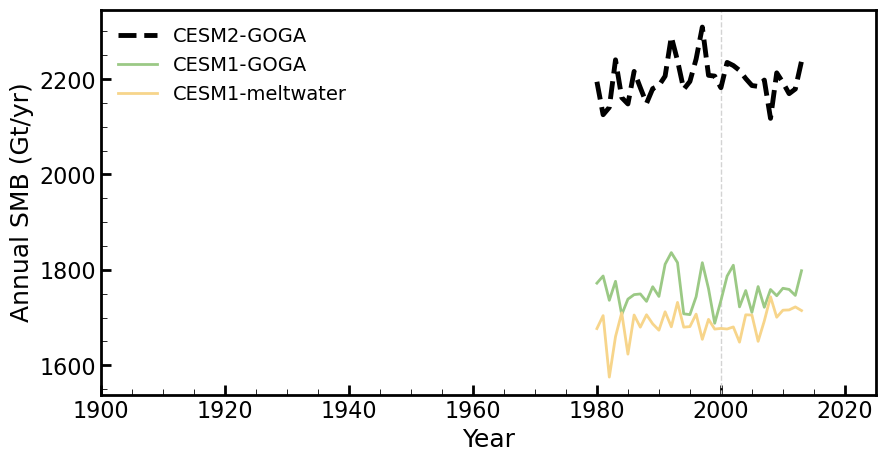

In [15]:
fig = plt.figure(figsize=(10, 5))
gs = GridSpec(5, 9)
plt.rcParams["axes.linewidth"] = 2  # set the value globally

size_tick = 16
size_label = 18
size_legend = 14
width_line = 2
width_box = 1.9

ax1 = plt.subplot(gs[0:5,0:9])

plt.axvline(x=2000, linestyle="--", color="lightgray", linewidth=1)
ax1.plot(SMB_GOGA2_int_yearly.year, SMB_GOGA2_int_yearly, color="black", linestyle="--", linewidth=width_line+1.5, label="CESM2-GOGA", zorder=5)
ax1.plot(SMB_GOGA1_int_yearly.year, SMB_GOGA1_int_yearly, color="#9BC985", linewidth=width_line, label="CESM1-GOGA")
ax1.plot(SMB_mw_int_yearly.year, SMB_mw_int_yearly, color="#F7D58B", linewidth=width_line, label="CESM1-meltwater")

ax1.legend(loc="best", frameon=False, prop={"size": size_legend}, ncol=1)

ax1.set_xlim([1900, 2025])
#ax1.set_ylim([-15*f09_ocn_area/1e12, 40*f09_ocn_area/1e12])
ax1.set_xlabel("Year", fontsize=size_label)
ax1.set_ylabel("Annual SMB (Gt/yr)", fontsize=size_label)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which="major", length=7, width=2, direction="in")
ax1.tick_params(which="minor", length=4, direction="in")
# ax1.set_yticks([-1000, -500, 0, 500])
ax1.tick_params(labelsize=size_tick)

#plt.savefig(
#    "tseries_AIS_SMB_check_before_regression.png",
#    dpi=300,
#    bbox_inches="tight",
#    facecolor="w",
#    transparent=False,
#)  #

### Linear regression

In [15]:
##Linear Regression of SMB
#CESM2-GOGA, 1980-2013
year = np.arange(1980, 2014)
slope_SMB_GOGA2_1980_2013 = SMB_GOGA2_yearly[0,:,:]*0

for i in range(192):
    for j in range(288):
        slope, intercept, r, p, se = linregress(year, SMB_GOGA2_yearly[:,i,j])
        slope_SMB_GOGA2_1980_2013[i,j] = slope

#CESM2-SOPACE, 1980-2013
year = np.arange(1980, 2014)
slope_SMB_SOPACE_1980_2013 = SMB_SOPACE_yearly[0,:,:]*0

for i in range(192):
    for j in range(288):
        slope, intercept, r, p, se = linregress(year, SMB_SOPACE_yearly[:,i,j])
        slope_SMB_SOPACE_1980_2013[i,j] = slope

#CESM1-GOGA, 1980-2013
year = np.arange(1980, 2014)
slope_SMB_GOGA1_1980_2013 = SMB_GOGA1_yearly[0,:,:]*0

for i in range(192):
    for j in range(288):
        slope, intercept, r, p, se = linregress(year, SMB_GOGA1_yearly[:,i,j])
        slope_SMB_GOGA1_1980_2013[i,j] = slope

#CESM1-meltwater, 1980-2013
year = np.arange(1980, 2014)
slope_SMB_mw_1980_2013 = SMB_mw_yearly[0,:,:]*0

for i in range(192):
    for j in range(288):
        slope, intercept, r, p, se = linregress(year, SMB_mw_yearly[:,i,j])
        slope_SMB_mw_1980_2013[i,j] = slope

In [16]:
#Add cyclic points
slope_SMB_GOGA2_full_1980_2013, lon_full = add_cyclic_point(slope_SMB_GOGA2_1980_2013, coord=lon)
slope_SMB_SOPACE_full_1980_2013, lon_full = add_cyclic_point(slope_SMB_SOPACE_1980_2013, coord=lon)
slope_SMB_GOGA1_full_1980_2013, lon_full = add_cyclic_point(slope_SMB_GOGA1_1980_2013, coord=lon)
slope_SMB_mw_full_1980_2013, lon_full = add_cyclic_point(slope_SMB_mw_1980_2013, coord=lon)

slope_SMB_GOGA2_full_1980_2013 = np.where(slope_SMB_GOGA2_full_1980_2013 != 0, slope_SMB_GOGA2_full_1980_2013, np.NaN)
slope_SMB_SOPACE_full_1980_2013 = np.where(slope_SMB_SOPACE_full_1980_2013 != 0, slope_SMB_SOPACE_full_1980_2013, np.NaN)
slope_SMB_GOGA1_full_1980_2013 = np.where(slope_SMB_GOGA1_full_1980_2013 != 0, slope_SMB_GOGA1_full_1980_2013, np.NaN)
slope_SMB_mw_full_1980_2013 = np.where(slope_SMB_mw_full_1980_2013 != 0, slope_SMB_mw_full_1980_2013, np.NaN)

In [38]:
# Calculate trend by epoch difference for CESM1 meltwater hosting
SMB_mw_trend = (SMB_mw_yearly.sel(year=slice('2000','2013')).mean(dim='year') - SMB_mw_yearly.sel(year=slice('1980','1993')).mean(dim='year')) / 20 #[mm/yr2]

# Set back nan values
SMB_mw_trend = np.where(SMB_mw_trend != 0, SMB_mw_trend, np.NaN)

SMB_mw_trend_full, lon_full = add_cyclic_point(SMB_mw_trend, coord=lon)

In [17]:
##Linear Regression of SST
#SST_ERSST5, 1980-2013
year = np.arange(1980, 2014)
slope_SST_ERSST5_1980_2013 = SST_ERSST5_yearly[0,:,:]*0

for i in range(89):
    for j in range(180):
        slope, intercept, r, p, se = linregress(year, SST_ERSST5_yearly[:,i,j])
        slope_SST_ERSST5_1980_2013[i,j] = slope * 34 # to [deg C / 34 yrs]

##SST_ERSST3, 1980-2013
#year = np.arange(1980, 2014)
#slope_SST_ERSST3_1980_2013 = SST_ERSST3_yearly[0,:,:]*0

#for i in range(89):
#    for j in range(180):
#        slope, intercept, r, p, se = linregress(year, SST_ERSST3_yearly[:,i,j])
#        slope_SST_ERSST3_1980_2013[i,j] = slope * 34

In [18]:
#Add cyclic points
SST_trend_ERSST5_full, lon_ERSST5_full = add_cyclic_point(slope_SST_ERSST5_1980_2013, coord=lon_ERSST5)
#SST_trend_ERSST3_full, lon_ERSST3_full = add_cyclic_point(slope_SST_ERSST3_1980_2013, coord=lon_ERSST3)
SST_trend_mw_full, lon_mw_coarse_full = add_cyclic_point(SST_trend_mw, coord=lon_mw_coarse)

SST_trend_ERSST5_full = np.where(SST_trend_ERSST5_full != 0, SST_trend_ERSST5_full, np.NaN)
#SST_trend_ERSST3_full = np.where(SST_trend_ERSST3_full != 0, SST_trend_ERSST3_full, np.NaN)
SST_trend_mw_full = np.where(SST_trend_mw_full != 0, SST_trend_mw_full, np.NaN)

### Spatial correlation

In [38]:
SMB_GOGA1_trend = slope_SMB_GOGA1_1980_2013
SMB_mw_trend = slope_SMB_mw_1980_2013

In [39]:
# Set back nan values
SMB_GOGA1_trend = np.where(SMB_GOGA1_trend != 0, SMB_GOGA1_trend, np.NaN)
SMB_mw_trend = np.where(SMB_mw_trend != 0, SMB_mw_trend, np.NaN)

In [40]:
# CESM1-GOGA
SMB_GOGA1_trend_flat = SMB_GOGA1_trend.flatten()
SMB_GOGA1_trend_flat_nonan = SMB_GOGA1_trend_flat[~np.isnan(SMB_GOGA1_trend_flat)]

# CESM1-meltwater
SMB_mw_trend_flat = SMB_mw_trend.flatten()
SMB_mw_trend_flat_nonan = SMB_mw_trend_flat[~np.isnan(SMB_mw_trend_flat)]

In [43]:
# Correlation
SMB_mw_trend_cor, _ = pearsonr(SMB_GOGA1_trend_flat_nonan, SMB_mw_trend_flat_nonan)
print('CESM1-mv: ', SMB_mw_trend_cor)

CESM1-mv:  0.621649021312215


## Plot

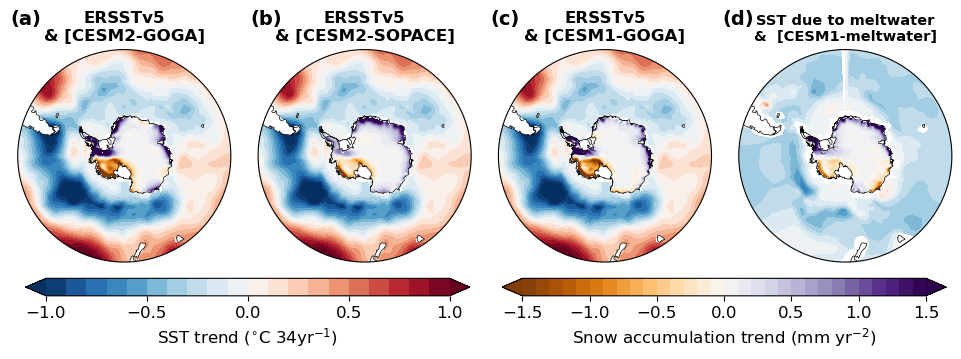

In [23]:
## 1x4, add [CESM2-SOPACE]
fig=plt.figure(figsize=(12,3.5))
gs=GridSpec(1,4)
plt.rcParams['axes.titlepad'] =14

#level_SMB = np.arange(-4, 4.1, 0.2)
#ticks_SMB = np.arange(-4, 4.1, 1.)
#level_SMB = np.arange(-2, 2.1, 0.1)
#ticks_SMB = np.arange(-2, 2.1, 0.5)
level_SMB = np.arange(-1.5, 1.51, 0.1)
ticks_SMB = np.arange(-1.5, 1.51, 0.5)
#level_SMB = np.arange(-0.8, 0.81, 0.05)
#ticks_SMB = np.arange(-0.8, 0.81, 0.4)

level_SST = np.arange(-1., 1.01, 0.1)
ticks_SST = np.arange(-1., 1.01, 0.5)

#level_PSL = np.arange(0-1.5*60, 0+1.5*61, 1.5)
level_PSL = np.arange(0-1*100, 0+1*100, 1)
level_PSL2 = np.arange(0-2*100, 0+2*100, 2)
level_PSL0 = np.arange(-100., 100.1, 100.)

size_title = 12
size_label = 12
size_tick = 12
size_text = 14
width_contour = 0.5

#cmap1 = colors.LinearSegmentedColormap.from_list("", ["darkred", "red", "orange", "gold", "white", "turquoise", "dodgerblue", "blue", "navy"])
cmap1 = 'RdBu_r'
cmap2 = 'PuOr'

######################### Subplot1 #########################
ax1 = plt.subplot(gs[0], projection=ccrs.SouthPolarStereo())
plot_antarctica_SO(ax1, -40)

ax1.add_feature(cfeature.COASTLINE, lw=0.5, zorder=4)
ax1.add_feature(cfeature.LAND, facecolor='white', zorder=2)
im1a = ax1.contourf(lon_ERSST5_full, lat_ERSST5, SST_trend_ERSST5_full, cmap=cmap1, transform=ccrs.PlateCarree(), levels=level_SST, extend='both', zorder=1)
im1b = ax1.contourf(lon_full, lat, slope_SMB_GOGA2_full_1980_2013, cmap=cmap2, transform=ccrs.PlateCarree(), levels=level_SMB, extend='both', zorder=3)

ax1.text(-6500000, 7400000, '(a)', fontsize=size_text, fontweight='bold')
ax1.set_title('ERSSTv5\n'
              '& [CESM2-GOGA]', pad=8, fontsize=size_title, fontweight='bold')

######################### Subplot2 #########################
ax2 = plt.subplot(gs[1], projection=ccrs.SouthPolarStereo())
plot_antarctica_SO(ax2, -40)

ax2.add_feature(cfeature.COASTLINE, lw=0.5, zorder=4)
ax2.add_feature(cfeature.LAND, facecolor='white', zorder=2)
im2a = ax2.contourf(lon_ERSST5_full, lat_ERSST5, SST_trend_ERSST5_full, cmap=cmap1, transform=ccrs.PlateCarree(), levels=level_SST, extend='both', zorder=1)
im2b = ax2.contourf(lon_full, lat, slope_SMB_SOPACE_full_1980_2013, cmap=cmap2, transform=ccrs.PlateCarree(), levels=level_SMB, extend='both', zorder=3)

ax2.text(-6500000, 7400000, '(b)', fontsize=size_text, fontweight='bold')
ax2.set_title('ERSSTv5\n'
              '& [CESM2-SOPACE]', pad=8, fontsize=size_title, fontweight='bold')

######################### Subplot3 #########################
ax3 = plt.subplot(gs[2], projection=ccrs.SouthPolarStereo())
plot_antarctica_SO(ax3, -40)

ax3.add_feature(cfeature.COASTLINE, lw=0.5, zorder=4)
ax3.add_feature(cfeature.LAND, facecolor='white', zorder=2)
im3a = ax3.contourf(lon_ERSST5_full, lat_ERSST5, SST_trend_ERSST5_full, cmap=cmap1, transform=ccrs.PlateCarree(), levels=level_SST, extend='both', zorder=1)
im3b = ax3.contourf(lon_full, lat, slope_SMB_GOGA1_full_1980_2013, cmap=cmap2, transform=ccrs.PlateCarree(), levels=level_SMB, extend='both', zorder=3)

ax3.text(-6500000, 7400000, '(c)', fontsize=size_text, fontweight='bold')
ax3.set_title('ERSSTv5\n'
              '& [CESM1-GOGA]', pad=8, fontsize=size_title, fontweight='bold')

######################### Subplot4 #########################
ax4 = plt.subplot(gs[3], projection=ccrs.SouthPolarStereo())
plot_antarctica_SO(ax4, -40)

ax4.add_feature(cfeature.COASTLINE, lw=0.5, zorder=4)
ax4.add_feature(cfeature.LAND, facecolor='white', zorder=2)
#im4a = ax4.contourf(lon_mw_coarse_full, lat_mw_coarse, SST_trend_mw_full, cmap=cmap1, transform=ccrs.PlateCarree(), levels=level_SST, extend='both', zorder=1)
im4a = ax4.contourf(lon_mw_coarse, lat_mw_coarse, SST_trend_mw, cmap=cmap1, transform=ccrs.PlateCarree(), levels=level_SST, extend='both', zorder=1)
im4b = ax4.contourf(lon_full, lat, slope_SMB_mw_full_1980_2013, cmap=cmap2, transform=ccrs.PlateCarree(), levels=level_SMB, extend='both', zorder=3)

ax4.text(-7000000, 7400000, '(d)', fontsize=size_text, fontweight='bold')
ax4.set_title('SST due to meltwater\n'
              '&  [CESM1-meltwater]', pad=8, fontsize=size_title-1.5, fontweight='bold')

#Colorbar
cbar1_ax = fig.add_axes([0.13, 0.15, 0.37, 0.05]) #[from left, from bottom, width, height]
cbar1 = fig.colorbar(im1a, cax=cbar1_ax, orientation='horizontal', pad=.05, extend='both', boundaries=level_SST, ticks=ticks_SST)
cbar1.ax.tick_params(labelsize=size_tick)
cbar1.set_label('SST trend ($^{\circ}$C 34yr$^{-1}$)', size=size_label)

cbar2_ax = fig.add_axes([0.527, 0.15, 0.37, 0.05]) #[from left, from bottom, width, height]
cbar2 = fig.colorbar(im1b, cax=cbar2_ax, orientation='horizontal', pad=.05, extend='both', boundaries=level_SMB, ticks=ticks_SMB)
cbar2.ax.tick_params(labelsize=size_tick)
cbar2.set_label('Snow accumulation trend (mm yr$^{-2}$)', size=size_label)


plt.subplots_adjust(#left=0.1,
                    bottom=0.22,
                    #right=0.9,
                    #top=0.9,
                    wspace=0.15,
                    hspace=0.09)
plt.savefig(
    'plot/F8_map_AIS_SMB_SST_trend2.jpg',
    dpi=500,
    bbox_inches="tight",
    facecolor="w",
    transparent=False,
)  #

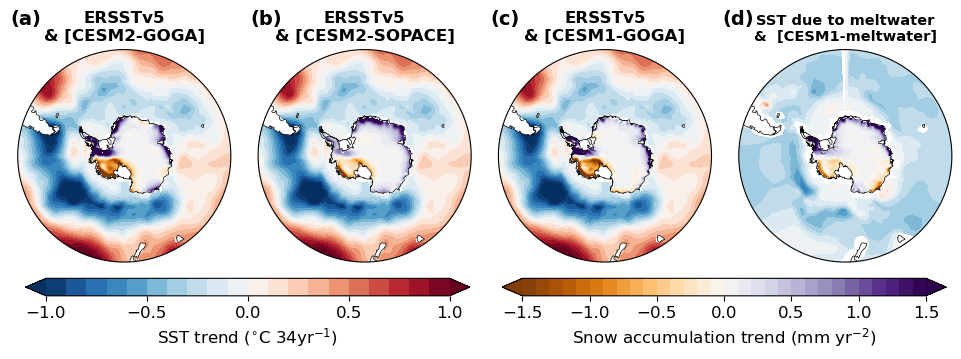

In [24]:
## Save in pdf format
fig=plt.figure(figsize=(12,3.5))
gs=GridSpec(1,4)
plt.rcParams['axes.titlepad'] =14

#level_SMB = np.arange(-4, 4.1, 0.2)
#ticks_SMB = np.arange(-4, 4.1, 1.)
#level_SMB = np.arange(-2, 2.1, 0.1)
#ticks_SMB = np.arange(-2, 2.1, 0.5)
level_SMB = np.arange(-1.5, 1.51, 0.1)
ticks_SMB = np.arange(-1.5, 1.51, 0.5)
#level_SMB = np.arange(-0.8, 0.81, 0.05)
#ticks_SMB = np.arange(-0.8, 0.81, 0.4)

level_SST = np.arange(-1., 1.01, 0.1)
ticks_SST = np.arange(-1., 1.01, 0.5)

#level_PSL = np.arange(0-1.5*60, 0+1.5*61, 1.5)
level_PSL = np.arange(0-1*100, 0+1*100, 1)
level_PSL2 = np.arange(0-2*100, 0+2*100, 2)
level_PSL0 = np.arange(-100., 100.1, 100.)

size_title = 12
size_label = 12
size_tick = 12
size_text = 14
width_contour = 0.5

#cmap1 = colors.LinearSegmentedColormap.from_list("", ["darkred", "red", "orange", "gold", "white", "turquoise", "dodgerblue", "blue", "navy"])
cmap1 = 'RdBu_r'
cmap2 = 'PuOr'

######################### Subplot1 #########################
ax1 = plt.subplot(gs[0], projection=ccrs.SouthPolarStereo())
plot_antarctica_SO(ax1, -40)

ax1.add_feature(cfeature.COASTLINE, lw=0.5, zorder=4)
ax1.add_feature(cfeature.LAND, facecolor='white', zorder=2)
im1a = ax1.contourf(lon_ERSST5_full, lat_ERSST5, SST_trend_ERSST5_full, cmap=cmap1, transform=ccrs.PlateCarree(), levels=level_SST, extend='both', zorder=1)
im1b = ax1.contourf(lon_full, lat, slope_SMB_GOGA2_full_1980_2013, cmap=cmap2, transform=ccrs.PlateCarree(), levels=level_SMB, extend='both', zorder=3)

ax1.text(-6500000, 7400000, '(a)', fontsize=size_text, fontweight='bold')
ax1.set_title('ERSSTv5\n'
              '& [CESM2-GOGA]', pad=8, fontsize=size_title, fontweight='bold')

######################### Subplot2 #########################
ax2 = plt.subplot(gs[1], projection=ccrs.SouthPolarStereo())
plot_antarctica_SO(ax2, -40)

ax2.add_feature(cfeature.COASTLINE, lw=0.5, zorder=4)
ax2.add_feature(cfeature.LAND, facecolor='white', zorder=2)
im2a = ax2.contourf(lon_ERSST5_full, lat_ERSST5, SST_trend_ERSST5_full, cmap=cmap1, transform=ccrs.PlateCarree(), levels=level_SST, extend='both', zorder=1)
im2b = ax2.contourf(lon_full, lat, slope_SMB_SOPACE_full_1980_2013, cmap=cmap2, transform=ccrs.PlateCarree(), levels=level_SMB, extend='both', zorder=3)

ax2.text(-6500000, 7400000, '(b)', fontsize=size_text, fontweight='bold')
ax2.set_title('ERSSTv5\n'
              '& [CESM2-SOPACE]', pad=8, fontsize=size_title, fontweight='bold')

######################### Subplot3 #########################
ax3 = plt.subplot(gs[2], projection=ccrs.SouthPolarStereo())
plot_antarctica_SO(ax3, -40)

ax3.add_feature(cfeature.COASTLINE, lw=0.5, zorder=4)
ax3.add_feature(cfeature.LAND, facecolor='white', zorder=2)
im3a = ax3.contourf(lon_ERSST5_full, lat_ERSST5, SST_trend_ERSST5_full, cmap=cmap1, transform=ccrs.PlateCarree(), levels=level_SST, extend='both', zorder=1)
im3b = ax3.contourf(lon_full, lat, slope_SMB_GOGA1_full_1980_2013, cmap=cmap2, transform=ccrs.PlateCarree(), levels=level_SMB, extend='both', zorder=3)

ax3.text(-6500000, 7400000, '(c)', fontsize=size_text, fontweight='bold')
ax3.set_title('ERSSTv5\n'
              '& [CESM1-GOGA]', pad=8, fontsize=size_title, fontweight='bold')

######################### Subplot4 #########################
ax4 = plt.subplot(gs[3], projection=ccrs.SouthPolarStereo())
plot_antarctica_SO(ax4, -40)

ax4.add_feature(cfeature.COASTLINE, lw=0.5, zorder=4)
ax4.add_feature(cfeature.LAND, facecolor='white', zorder=2)
#im4a = ax4.contourf(lon_mw_coarse_full, lat_mw_coarse, SST_trend_mw_full, cmap=cmap1, transform=ccrs.PlateCarree(), levels=level_SST, extend='both', zorder=1)
im4a = ax4.contourf(lon_mw_coarse, lat_mw_coarse, SST_trend_mw, cmap=cmap1, transform=ccrs.PlateCarree(), levels=level_SST, extend='both', zorder=1)
im4b = ax4.contourf(lon_full, lat, slope_SMB_mw_full_1980_2013, cmap=cmap2, transform=ccrs.PlateCarree(), levels=level_SMB, extend='both', zorder=3)

ax4.text(-7000000, 7400000, '(d)', fontsize=size_text, fontweight='bold')
ax4.set_title('SST due to meltwater\n'
              '&  [CESM1-meltwater]', pad=8, fontsize=size_title-1.5, fontweight='bold')

#Colorbar
cbar1_ax = fig.add_axes([0.13, 0.15, 0.37, 0.05]) #[from left, from bottom, width, height]
cbar1 = fig.colorbar(im1a, cax=cbar1_ax, orientation='horizontal', pad=.05, extend='both', boundaries=level_SST, ticks=ticks_SST)
cbar1.ax.tick_params(labelsize=size_tick)
cbar1.set_label('SST trend ($^{\circ}$C 34yr$^{-1}$)', size=size_label)

cbar2_ax = fig.add_axes([0.527, 0.15, 0.37, 0.05]) #[from left, from bottom, width, height]
cbar2 = fig.colorbar(im1b, cax=cbar2_ax, orientation='horizontal', pad=.05, extend='both', boundaries=level_SMB, ticks=ticks_SMB)
cbar2.ax.tick_params(labelsize=size_tick)
cbar2.set_label('Snow accumulation trend (mm yr$^{-2}$)', size=size_label)


plt.subplots_adjust(#left=0.1,
                    bottom=0.22,
                    #right=0.9,
                    #top=0.9,
                    wspace=0.15,
                    hspace=0.09)
plt.savefig(
    "plot/F8_map_AIS_SMB_SST_trend2.pdf",
    bbox_inches="tight",
    facecolor="w",
    transparent=False,
)

#### Remove CESM2-SOPACE 

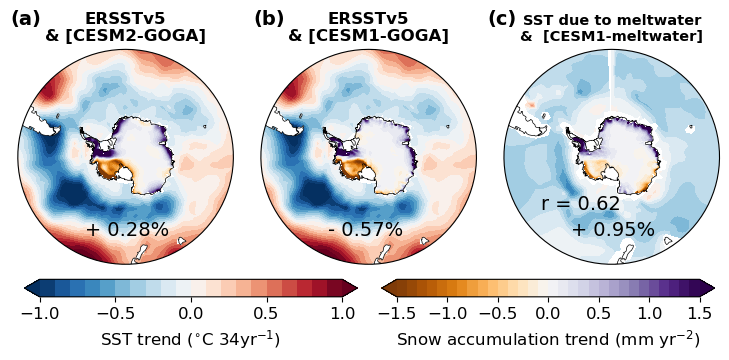

In [45]:
## 1x3
fig=plt.figure(figsize=(9,3.5))
gs=GridSpec(1,3)
plt.rcParams['axes.titlepad'] =14

#level_SMB = np.arange(-4, 4.1, 0.2)
#ticks_SMB = np.arange(-4, 4.1, 1.)
#level_SMB = np.arange(-2, 2.1, 0.1)
#ticks_SMB = np.arange(-2, 2.1, 0.5)
level_SMB = np.arange(-1.5, 1.51, 0.1)
ticks_SMB = np.arange(-1.5, 1.51, 0.5)
#level_SMB = np.arange(-0.8, 0.81, 0.05)
#ticks_SMB = np.arange(-0.8, 0.81, 0.4)

level_SST = np.arange(-1., 1.01, 0.1)
ticks_SST = np.arange(-1., 1.01, 0.5)

#level_PSL = np.arange(0-1.5*60, 0+1.5*61, 1.5)
level_PSL = np.arange(0-1*100, 0+1*100, 1)
level_PSL2 = np.arange(0-2*100, 0+2*100, 2)
level_PSL0 = np.arange(-100., 100.1, 100.)

size_title = 12
size_label = 12
size_tick = 12
size_text = 14
width_contour = 0.5

#cmap1 = colors.LinearSegmentedColormap.from_list("", ["darkred", "red", "orange", "gold", "white", "turquoise", "dodgerblue", "blue", "navy"])
cmap1 = 'RdBu_r'
cmap2 = 'PuOr'

######################### Subplot1 #########################
ax1 = plt.subplot(gs[0], projection=ccrs.SouthPolarStereo())
plot_antarctica_SO(ax1, -40)

ax1.add_feature(cfeature.COASTLINE, lw=0.5, zorder=4)
ax1.add_feature(cfeature.LAND, facecolor='white', zorder=2)
im1a = ax1.contourf(lon_ERSST5_full, lat_ERSST5, SST_trend_ERSST5_full, cmap=cmap1, transform=ccrs.PlateCarree(), levels=level_SST, extend='both', zorder=1)
im1b = ax1.contourf(lon_full, lat, slope_SMB_GOGA2_full_1980_2013, cmap=cmap2, transform=ccrs.PlateCarree(), levels=level_SMB, extend='both', zorder=3)

ax1.text(-6500000, 7400000, '(a)', fontsize=size_text, fontweight='bold')
ax1.set_title('ERSSTv5\n'
              '& [CESM2-GOGA]', pad=8, fontsize=size_title, fontweight='bold')
plt.text(-2300000, -4450000, '+ 0.28%', fontsize=size_text)

######################### Subplot2 #########################
ax3 = plt.subplot(gs[1], projection=ccrs.SouthPolarStereo())
plot_antarctica_SO(ax3, -40)

ax3.add_feature(cfeature.COASTLINE, lw=0.5, zorder=4)
ax3.add_feature(cfeature.LAND, facecolor='white', zorder=2)
im3a = ax3.contourf(lon_ERSST5_full, lat_ERSST5, SST_trend_ERSST5_full, cmap=cmap1, transform=ccrs.PlateCarree(), levels=level_SST, extend='both', zorder=1)
im3b = ax3.contourf(lon_full, lat, slope_SMB_GOGA1_full_1980_2013, cmap=cmap2, transform=ccrs.PlateCarree(), levels=level_SMB, extend='both', zorder=3)

ax3.text(-6500000, 7400000, '(b)', fontsize=size_text, fontweight='bold')
ax3.set_title('ERSSTv5\n'
              '& [CESM1-GOGA]', pad=8, fontsize=size_title, fontweight='bold')
plt.text(-2300000, -4450000, '- 0.57%', fontsize=size_text)

######################### Subplot3 #########################
ax4 = plt.subplot(gs[2], projection=ccrs.SouthPolarStereo())
plot_antarctica_SO(ax4, -40)

ax4.add_feature(cfeature.COASTLINE, lw=0.5, zorder=4)
ax4.add_feature(cfeature.LAND, facecolor='white', zorder=2)
#im4a = ax4.contourf(lon_mw_coarse_full, lat_mw_coarse, SST_trend_mw_full, cmap=cmap1, transform=ccrs.PlateCarree(), levels=level_SST, extend='both', zorder=1)
im4a = ax4.contourf(lon_mw_coarse, lat_mw_coarse, SST_trend_mw, cmap=cmap1, transform=ccrs.PlateCarree(), levels=level_SST, extend='both', zorder=1)
im4b = ax4.contourf(lon_full, lat, slope_SMB_mw_full_1980_2013, cmap=cmap2, transform=ccrs.PlateCarree(), levels=level_SMB, extend='both', zorder=3)

ax4.text(-7000000, 7400000, '(c)', fontsize=size_text, fontweight='bold')
ax4.set_title('SST due to meltwater\n'
              '&  [CESM1-meltwater]', pad=8, fontsize=size_title-1.5, fontweight='bold')
plt.text(-4000000, -3000000, 'r = 0.62', fontsize=size_text)
plt.text(-2300000, -4450000, '+ 0.95%', fontsize=size_text)

#Colorbar
cbar1_ax = fig.add_axes([0.13, 0.15, 0.37, 0.05]) #[from left, from bottom, width, height]
cbar1 = fig.colorbar(im1a, cax=cbar1_ax, orientation='horizontal', pad=.05, extend='both', boundaries=level_SST, ticks=ticks_SST)
cbar1.ax.tick_params(labelsize=size_tick)
cbar1.set_label('SST trend ($^{\circ}$C 34yr$^{-1}$)', size=size_label)

cbar2_ax = fig.add_axes([0.527, 0.15, 0.37, 0.05]) #[from left, from bottom, width, height]
cbar2 = fig.colorbar(im1b, cax=cbar2_ax, orientation='horizontal', pad=.05, extend='both', boundaries=level_SMB, ticks=ticks_SMB)
cbar2.ax.tick_params(labelsize=size_tick)
cbar2.set_label('Snow accumulation trend (mm yr$^{-2}$)', size=size_label)


plt.subplots_adjust(#left=0.1,
                    bottom=0.22,
                    #right=0.9,
                    #top=0.9,
                    wspace=0.15,
                    hspace=0.09)
plt.savefig(
    'plot/F8_map_AIS_SMB_SST_trend2_noSOPACE.jpg',
    dpi=500,
    bbox_inches="tight",
    facecolor="w",
    transparent=False,
)  #

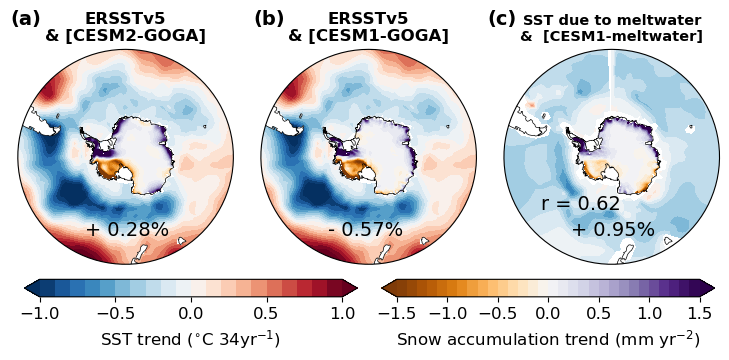

In [46]:
## 1x3
fig=plt.figure(figsize=(9,3.5))
gs=GridSpec(1,3)
plt.rcParams['axes.titlepad'] =14

#level_SMB = np.arange(-4, 4.1, 0.2)
#ticks_SMB = np.arange(-4, 4.1, 1.)
#level_SMB = np.arange(-2, 2.1, 0.1)
#ticks_SMB = np.arange(-2, 2.1, 0.5)
level_SMB = np.arange(-1.5, 1.51, 0.1)
ticks_SMB = np.arange(-1.5, 1.51, 0.5)
#level_SMB = np.arange(-0.8, 0.81, 0.05)
#ticks_SMB = np.arange(-0.8, 0.81, 0.4)

level_SST = np.arange(-1., 1.01, 0.1)
ticks_SST = np.arange(-1., 1.01, 0.5)

#level_PSL = np.arange(0-1.5*60, 0+1.5*61, 1.5)
level_PSL = np.arange(0-1*100, 0+1*100, 1)
level_PSL2 = np.arange(0-2*100, 0+2*100, 2)
level_PSL0 = np.arange(-100., 100.1, 100.)

size_title = 12
size_label = 12
size_tick = 12
size_text = 14
width_contour = 0.5

#cmap1 = colors.LinearSegmentedColormap.from_list("", ["darkred", "red", "orange", "gold", "white", "turquoise", "dodgerblue", "blue", "navy"])
cmap1 = 'RdBu_r'
cmap2 = 'PuOr'

######################### Subplot1 #########################
ax1 = plt.subplot(gs[0], projection=ccrs.SouthPolarStereo())
plot_antarctica_SO(ax1, -40)

ax1.add_feature(cfeature.COASTLINE, lw=0.5, zorder=4)
ax1.add_feature(cfeature.LAND, facecolor='white', zorder=2)
im1a = ax1.contourf(lon_ERSST5_full, lat_ERSST5, SST_trend_ERSST5_full, cmap=cmap1, transform=ccrs.PlateCarree(), levels=level_SST, extend='both', zorder=1)
im1b = ax1.contourf(lon_full, lat, slope_SMB_GOGA2_full_1980_2013, cmap=cmap2, transform=ccrs.PlateCarree(), levels=level_SMB, extend='both', zorder=3)

ax1.text(-6500000, 7400000, '(a)', fontsize=size_text, fontweight='bold')
ax1.set_title('ERSSTv5\n'
              '& [CESM2-GOGA]', pad=8, fontsize=size_title, fontweight='bold')
plt.text(-2300000, -4450000, '+ 0.28%', fontsize=size_text)

######################### Subplot2 #########################
ax3 = plt.subplot(gs[1], projection=ccrs.SouthPolarStereo())
plot_antarctica_SO(ax3, -40)

ax3.add_feature(cfeature.COASTLINE, lw=0.5, zorder=4)
ax3.add_feature(cfeature.LAND, facecolor='white', zorder=2)
im3a = ax3.contourf(lon_ERSST5_full, lat_ERSST5, SST_trend_ERSST5_full, cmap=cmap1, transform=ccrs.PlateCarree(), levels=level_SST, extend='both', zorder=1)
im3b = ax3.contourf(lon_full, lat, slope_SMB_GOGA1_full_1980_2013, cmap=cmap2, transform=ccrs.PlateCarree(), levels=level_SMB, extend='both', zorder=3)

ax3.text(-6500000, 7400000, '(b)', fontsize=size_text, fontweight='bold')
ax3.set_title('ERSSTv5\n'
              '& [CESM1-GOGA]', pad=8, fontsize=size_title, fontweight='bold')
plt.text(-2300000, -4450000, '- 0.57%', fontsize=size_text)

######################### Subplot3 #########################
ax4 = plt.subplot(gs[2], projection=ccrs.SouthPolarStereo())
plot_antarctica_SO(ax4, -40)

ax4.add_feature(cfeature.COASTLINE, lw=0.5, zorder=4)
ax4.add_feature(cfeature.LAND, facecolor='white', zorder=2)
#im4a = ax4.contourf(lon_mw_coarse_full, lat_mw_coarse, SST_trend_mw_full, cmap=cmap1, transform=ccrs.PlateCarree(), levels=level_SST, extend='both', zorder=1)
im4a = ax4.contourf(lon_mw_coarse, lat_mw_coarse, SST_trend_mw, cmap=cmap1, transform=ccrs.PlateCarree(), levels=level_SST, extend='both', zorder=1)
im4b = ax4.contourf(lon_full, lat, slope_SMB_mw_full_1980_2013, cmap=cmap2, transform=ccrs.PlateCarree(), levels=level_SMB, extend='both', zorder=3)

ax4.text(-7000000, 7400000, '(c)', fontsize=size_text, fontweight='bold')
ax4.set_title('SST due to meltwater\n'
              '&  [CESM1-meltwater]', pad=8, fontsize=size_title-1.5, fontweight='bold')
plt.text(-4000000, -3000000, 'r = 0.62', fontsize=size_text)
plt.text(-2300000, -4450000, '+ 0.95%', fontsize=size_text)

#Colorbar
cbar1_ax = fig.add_axes([0.13, 0.15, 0.37, 0.05]) #[from left, from bottom, width, height]
cbar1 = fig.colorbar(im1a, cax=cbar1_ax, orientation='horizontal', pad=.05, extend='both', boundaries=level_SST, ticks=ticks_SST)
cbar1.ax.tick_params(labelsize=size_tick)
cbar1.set_label('SST trend ($^{\circ}$C 34yr$^{-1}$)', size=size_label)

cbar2_ax = fig.add_axes([0.527, 0.15, 0.37, 0.05]) #[from left, from bottom, width, height]
cbar2 = fig.colorbar(im1b, cax=cbar2_ax, orientation='horizontal', pad=.05, extend='both', boundaries=level_SMB, ticks=ticks_SMB)
cbar2.ax.tick_params(labelsize=size_tick)
cbar2.set_label('Snow accumulation trend (mm yr$^{-2}$)', size=size_label)


plt.subplots_adjust(#left=0.1,
                    bottom=0.22,
                    #right=0.9,
                    #top=0.9,
                    wspace=0.15,
                    hspace=0.09)
plt.savefig(
    "plot/F8_map_AIS_SMB_SST_trend2_noSOPACE.pdf",
    bbox_inches="tight",
    facecolor="w",
    transparent=False,
)